### Import Libraries

In [158]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

### Import Training Data

In [159]:
dft = pd.read_csv("train.csv")
dft.sample(5)

,duracion,paginas,acciones,valor,class
14,872.0,2,6,6,2
55,20.0,3,21,63,0
50,2.0,2,20,120,0
64,116.0,2,16,64,0
129,11.0,1,1,2,2


**Make Column of Class Name**

In [160]:
def class_name(x):
    if x == 0:
        return "Windows"
    elif x == 1:
        return "Macintosh"
    else:
        return "Linux"

dft["class_name"] = dft["class"].apply(class_name)
dft.sample(5)

,duracion,paginas,acciones,valor,class,class_name
157,11.0,1,5,15,0,Windows
49,1.0,2,18,36,0,Windows
131,13.0,1,7,35,0,Windows
103,13.0,1,5,20,1,Macintosh
7,162.0,2,6,12,2,Linux


**Data Information**

In [161]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   duracion    170 non-null    float64
 1   paginas     170 non-null    int64  
 2   acciones    170 non-null    int64  
 3   valor       170 non-null    int64  
 4   class       170 non-null    int64  
 5   class_name  170 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.1+ KB


**Make Class Column Categorical**

In [162]:
dft["class"] = dft["class"].astype("category")

**Data Statistics**

In [163]:
dft.describe()

,duracion,paginas,acciones,valor
count,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471
std,202.453200,1.500911,9.136054,44.751993
min,1.000000,1.000000,1.000000,1.000000
25%,11.000000,1.000000,3.000000,8.000000
50%,13.000000,2.000000,6.000000,20.000000
75%,108.000000,2.000000,10.000000,36.000000
max,898.000000,9.000000,63.000000,378.000000


### Exploratory Data Analysis

**Distribution of visit duration in seconds**

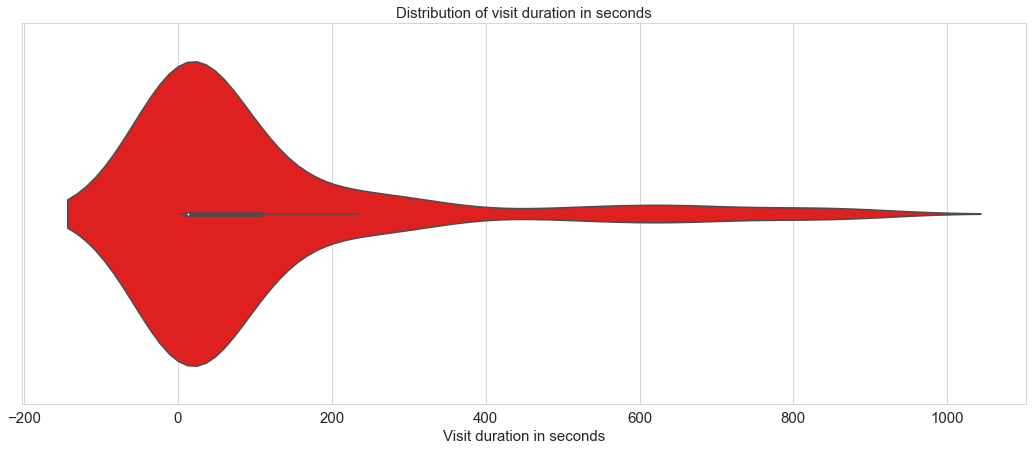

In [164]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "duracion", data = dft, color = "red")
plt.title("Distribution of visit duration in seconds", size = 15)
plt.xlabel("Visit duration in seconds", size = 15)
plt.xticks(size = 15)
plt.savefig("Duration.png")
plt.show()

**Distribution of Number of Page Views during the Session**

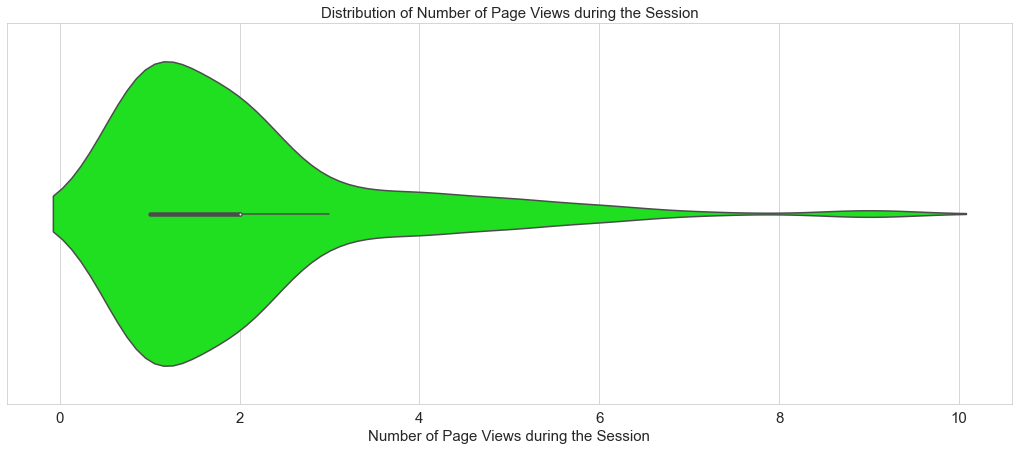

In [165]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "paginas", data = dft, color = "lime")
plt.title("Distribution of Number of Page Views during the Session", size = 15)
plt.xlabel("Number of Page Views during the Session", size = 15)
plt.xticks(size = 15)
plt.savefig("Page_Views_Season.png")
plt.show()

**Distribution of Amount of User Actions**

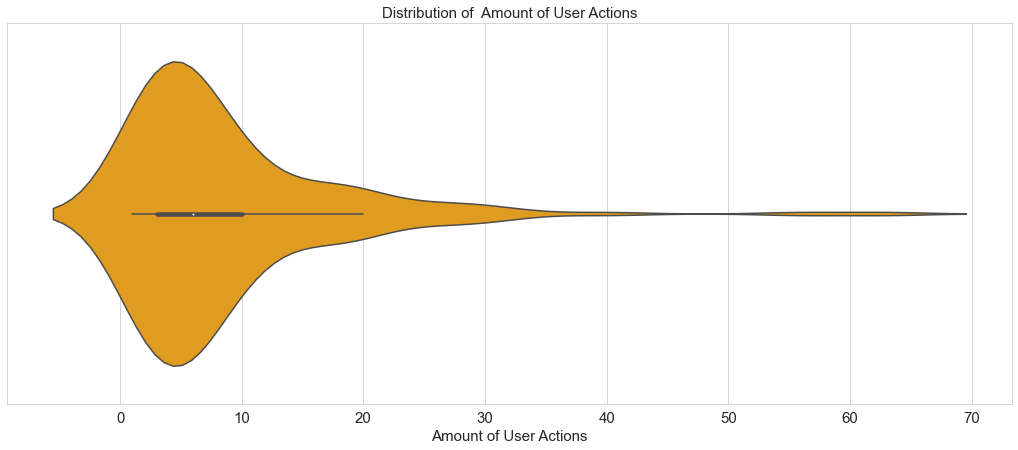

In [166]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "acciones", data = dft, color = "orange")
plt.title("Distribution of  Amount of User Actions", size = 15)
plt.xlabel("Amount of User Actions", size = 15)
plt.xticks(size = 15)
plt.savefig("User_Actions.png")
plt.show()

**Distribution of Sum of the value of the shares**

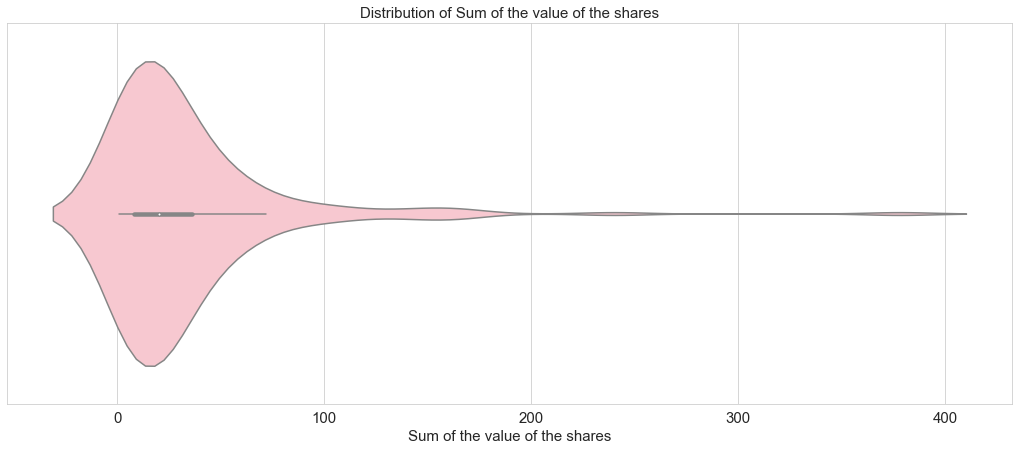

In [167]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "valor", data = dft, color = "pink")
plt.title("Distribution of Sum of the value of the shares", size = 15)
plt.xlabel("Sum of the value of the shares", size = 15)
plt.xticks(size = 15)
plt.savefig("Share_Values.png")
plt.show()

In [168]:
sns.set_style("whitegrid")

**Visit duration in seconds by Class**

In [169]:
vdc = dft.groupby("class_name")["duracion"].agg(["count", "sum", "min", "mean", "max"]).round(2)
vdc

,count,sum,min,mean,max
class_name,,,,,
Linux,44,5836.60,1.10,132.65,898.0
Macintosh,40,6249.38,1.09,156.23,848.0
Windows,86,6796.90,1.00,79.03,783.0


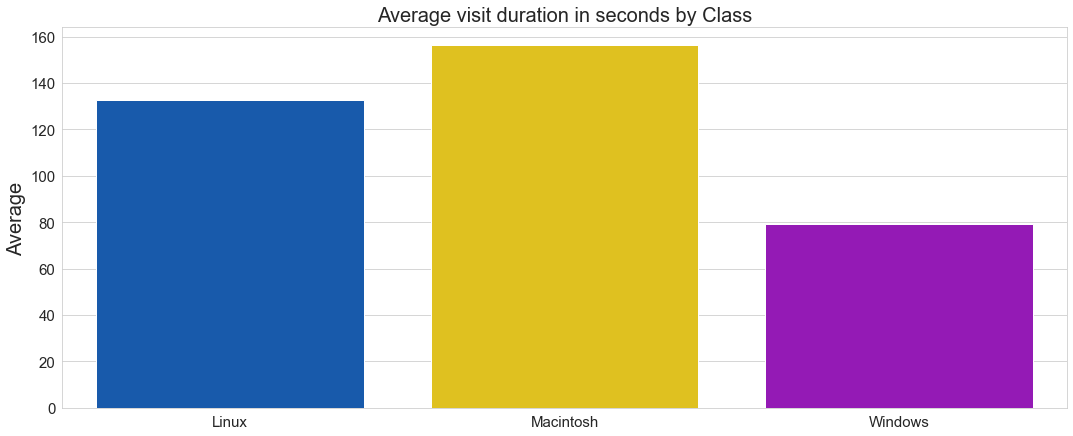

In [170]:
plt.figure(figsize = (18, 7))
sns.barplot(x = vdc.index, y = vdc["mean"], data = vdc, palette = "prism")
plt.title("Average visit duration in seconds by Class", size = 20)
plt.xlabel(None)
plt.ylabel("Average", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Number of Page Views during the Session by Class**

In [171]:
psc = dft.groupby("class_name")["paginas"].agg(["count", "sum", "min", "mean", "max"]).round(2)
psc

,count,sum,min,mean,max
class_name,,,,,
Linux,44,86,1,1.95,6
Macintosh,40,78,1,1.95,6
Windows,86,183,1,2.13,9


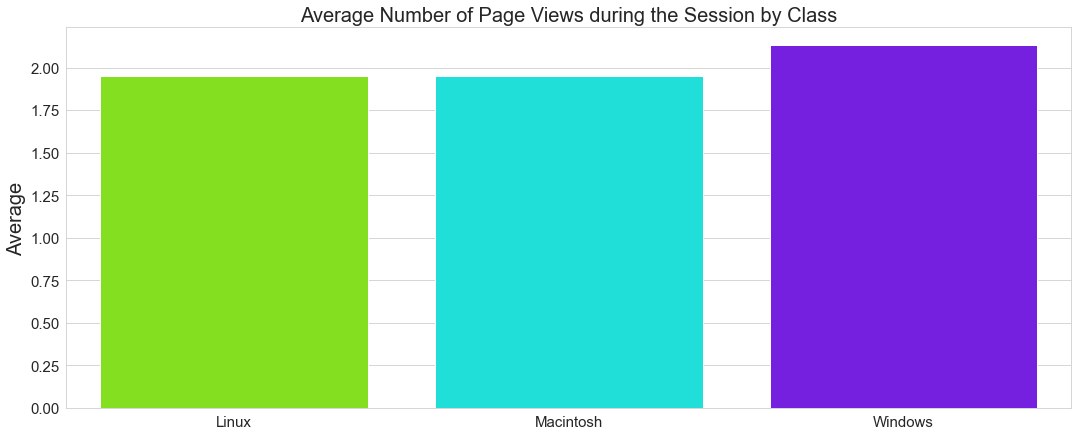

In [172]:
plt.figure(figsize = (18, 7))
sns.barplot(x = psc.index, y = psc["mean"], data = psc, palette = "hsv")
plt.title("Average Number of Page Views during the Session by Class", size = 20)
plt.xlabel(None)
plt.ylabel("Average", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Amount of User Actions by Class**

In [173]:
uac = dft.groupby("class_name")["acciones"].agg(["count", "sum", "min", "mean", "max"]).round(2)
uac

,count,sum,min,mean,max
class_name,,,,,
Linux,44,191,1,4.34,15
Macintosh,40,306,2,7.65,24
Windows,86,986,1,11.47,63


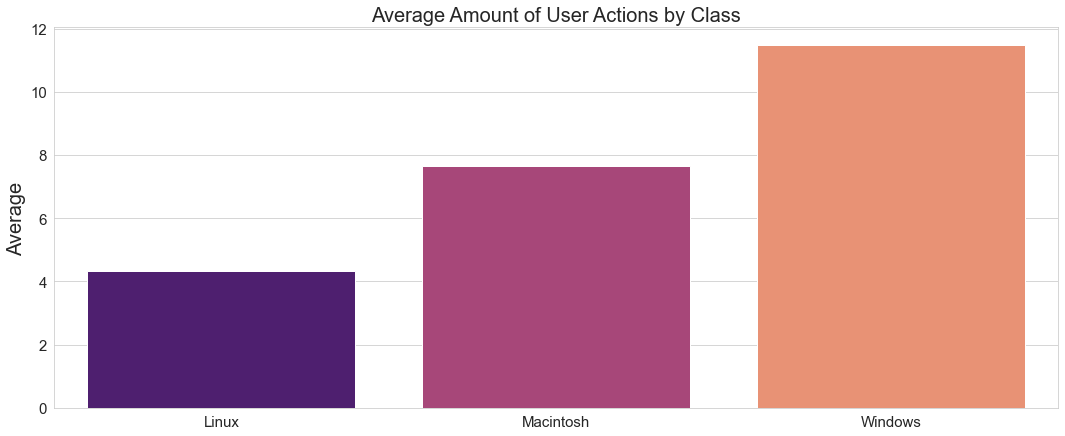

In [174]:
plt.figure(figsize = (18, 7))
sns.barplot(x = uac.index, y = uac["mean"], data = uac, palette = "magma")
plt.title("Average Amount of User Actions by Class", size = 20)
plt.xlabel(None)
plt.ylabel("Average", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Sum of the value of the shares by Class**

In [175]:
vsc = dft.groupby("class_name")["valor"].agg(["count", "sum", "min", "mean", "max"]).round(2)
vsc

,count,sum,min,mean,max
class_name,,,,,
Linux,44,287,1,6.52,24
Macintosh,40,1555,12,38.88,144
Windows,86,3713,2,43.17,378


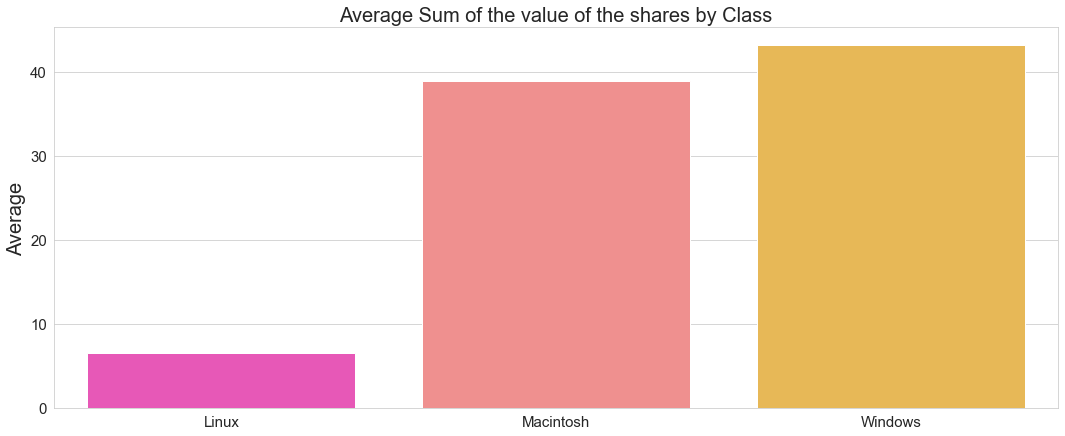

In [176]:
plt.figure(figsize = (18, 7))
sns.barplot(x = vsc.index, y = vsc["mean"], data = vsc, palette = "spring")
plt.title("Average Sum of the value of the shares by Class", size = 20)
plt.xlabel(None)
plt.ylabel("Average", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Machine Learning

**Prepare features and target**

In [177]:
# Features
X = dft[dft.columns.drop(["class", "class_name"])]

# Target
y = dft["class"]

**Import Test Data**

In [178]:
test = pd.read_csv("test.csv")
test.sample(3)

,duracion,paginas,acciones,valor
11,674,3,6,88
2,26,2,4,8
5,13,1,8,9


**Split Data into training and test set**

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

# Logistic Regression

In [180]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
pd.DataFrame({"Actual": y_test,
             "Predicted": pred_lr}).sample(5)

,Actual,Predicted
158,0,0
135,0,0
25,1,1
2,2,2
98,1,1


**Confusion Matrix**

In [181]:
pd.DataFrame(confusion_matrix(y_test, pred_lr))

,0,1,2
0,12,0,5
1,3,5,0
2,0,0,9


**Classification Report**

In [182]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       1.00      0.62      0.77         8
           2       0.64      1.00      0.78         9

    accuracy                           0.76        34
   macro avg       0.81      0.78      0.77        34
weighted avg       0.81      0.76      0.76        34



### Prediction on Test Data through Logistic Regression

In [183]:
lr = LogisticRegression()

lr.fit(X, y)

pred_lr = lr.predict(test)
pred_lr

array([0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1], dtype=int64)

# Decision Trees

In [184]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_dt}).sample(5)

,Actual,Predicted
72,0,2
2,2,2
122,2,2
135,0,0
78,0,0


**Confusion Matrix**

In [185]:
pd.DataFrame(confusion_matrix(y_test, pred_dt))

,0,1,2
0,11,1,5
1,4,4,0
2,0,0,9


**Classification Report**

In [186]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69        17
           1       0.80      0.50      0.62         8
           2       0.64      1.00      0.78         9

    accuracy                           0.71        34
   macro avg       0.73      0.72      0.70        34
weighted avg       0.73      0.71      0.70        34



### Prediction on Test Data through Decision Trees 

In [187]:
dtt = DecisionTreeClassifier()

dtt.fit(X, y)

pred_dtt = dtt.predict(test)
pred_dtt

array([2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

### Random Forest Classifier

In [188]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
pd.DataFrame({"Actual": y_test,
              "Predicted": pred_rf}).sample(5)

,Actual,Predicted
111,2,2
70,0,0
23,1,1
163,0,0
158,0,0


**Confusion Matrix**

In [189]:
pd.DataFrame(confusion_matrix(y_test, pred_rf))

,0,1,2
0,12,0,5
1,3,5,0
2,0,0,9


**Classification Report**

In [190]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       1.00      0.62      0.77         8
           2       0.64      1.00      0.78         9

    accuracy                           0.76        34
   macro avg       0.81      0.78      0.77        34
weighted avg       0.81      0.76      0.76        34



### Prediction on Test Data through Random Forest

In [191]:
rft = RandomForestClassifier()

rft.fit(X_train, y_train)

pred_rft = rft.predict(test)
pred_rft

array([2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)